### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 3

Magnetfelt er generelt vanskelig å studere analytisk, hvor analytiske resultater er kjent kun for noen få systemer. Denne øvingen handler om å studere to av disse systemene ved å se på magnetfeltet rundt strømførende ledninger i to forskjellige orienteringer. Den første oppgaven innebærer å diskretisere og utføre et numerisk integral av en endelig ledning parallelt med planet. Den andre oppgaven er valgfri, og omhandler en ledning som står vinkelrett på planet, siden $\nabla \times \vec{B} \neq 0$ vil dette føre til noen numeriske utfordringer mht. retningen på feltlinjene. Det forventes kjennskap til plotting av funksjoner i to dimensjoner, samt bruk av to-dimensjonale arrays i form av meshgrids.

### Oppgave 1: Numerisk Integrasjon

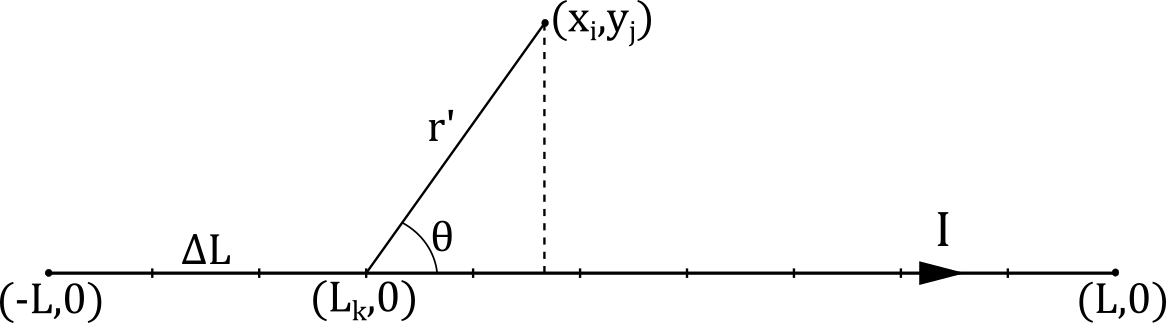

Systemet vi skal se på består av en endelig ledning som går fra $(-L,0)$ til $(L,0)$ der strømmen $I$ har retning mot høyre som vist på figuren. Fra Biot-Savarts lov har vi at magnetfeltet fra en slik ledning er gitt ved
\begin{equation}
\vec{B}(\vec{r}) = \frac{\mu_0I}{4 \pi} \int_{\textit{C}}\frac{\text{d}\vec{l} \times \vec{r}'}{r'^3} \text{,}
\end{equation}
der $\vec{r}':=\vec{r}-\vec{l}$ er en vektor fra et punkt $\vec{l}$ på ledningen til $\vec{r} = (x,y)$. Integralet går over hele ledningen. 

Vi kan skrive ut kryssproduktet som $\text{d}\vec{l}\times\vec{r}' = |\text{d}\vec{l}||\vec{r}'|\sin\theta$, og vi ser fra figuren at $\sin\theta = \frac{y}{|\vec{r}'|}$. I tillegg ligger både $\vec{r'}$ og $\text{d}\vec{l}$ i xy-planet, så magnetfeltet er rettet langs z-aksen. Ved å sette inn alt dette i Biot-Savarts lov, finner vi at styrken på magnetfeltet er gitt ved
\begin{equation}
    B(x,y) = \frac{\mu_0I}{4 \pi} \int_{-L}^{L}\frac{\text{d}x\, y}{|r'|^3}.
\end{equation}

Vi skal nå utføre dette integralet numerisk, ved å skrive det om til en diskret sum over punkter på ledningen. Generellt kan vi dele inn ledningen i $N$ punkter (10 på figuren i og med at vi ikke teller høyre endepunkt) med innbyrdes avstand $\Delta L$. Et punkt på ledningen har da koordinat $(L_k, 0)$, der $L_k \in \{-L, -L+\Delta L, -L+2\Delta L, ... ,L-\Delta L\}$. Videre ser vi fra figuren at $|r'| = \sqrt{(L_k - x_i)^2 + y_j^2}$. Dermed kan integralet vårt skrives som
\begin{equation}
    B(x_i, y_j) = \frac{\mu_0I}{4 \pi} \sum_{k=1}^{N}\frac{\Delta L y_j}{((L_k-x_i)^2 +y_j^2))^{3/2}}
\end{equation}


## a)
Lag en funksjon create_wire som returnerer en array med $N$ punkter fra $-L$ til $L-\Delta L$.

In [8]:
import numpy as np

def create_wire(L,N):
    delta_L = 2*L/N
    return np.linspace(-L, L - delta_L, N)

## b)
Lag en funksjon calc_magneticfield som regner ut det magnetiske feltet for et meshgrid (xi, yj). Denne burde også ha ledningen du laget i a) som input. Magnetfeltet regnes ut ved å utføre den diskrete summen som ble utledet i introduksjonen. 

Tips: Ettersom vi deler på null når $x_i = L_k$ og $y_j = 0$, vil det oppstå numeriske singulariteter langs ledningen. Dette må løses på et fornuftig vis. 

In [9]:
def calc_magneticfield(xi, yj, wire, I = 1.0, mu0 = 4*np.pi*1e-7):
    """
    Beregner magnetfeltet B(xi, yj) fra en rett strømførende ledning langs x-aksen.
    
    Parametere:
    - xi, yj: 2D arrays fra np.meshgrid
    - wire: array med punkter på ledningen (fra create_wire)
    - I: strømmen i ledningen
    - mu0: permeabiliteten til vakuum

    Returnerer:
    - B: 2D array med magnetfeltstyrker
    """
    B = np.zeros_like(xi)
    N = len(wire)
    delta_L = wire[1] - wire[0]
    epsilon = 1e-12  # liten konstant for å unngå singularitet

    for Lk in wire:
        r_squared = (Lk - xi)**2 + yj**2
        B += (delta_L * yj) / (r_squared + epsilon)**(1.5)

    B *= mu0 * I / (4 * np.pi)
    return B

## c) 
Fremstill resultatene i et heatplot. Dere kan f.eks velge $L=1$ og plotte for et område $x,y \in (-2,2)$. Magnetfeltet burde normaliseres (plottes i enhet $\mu_0I/4\pi$).

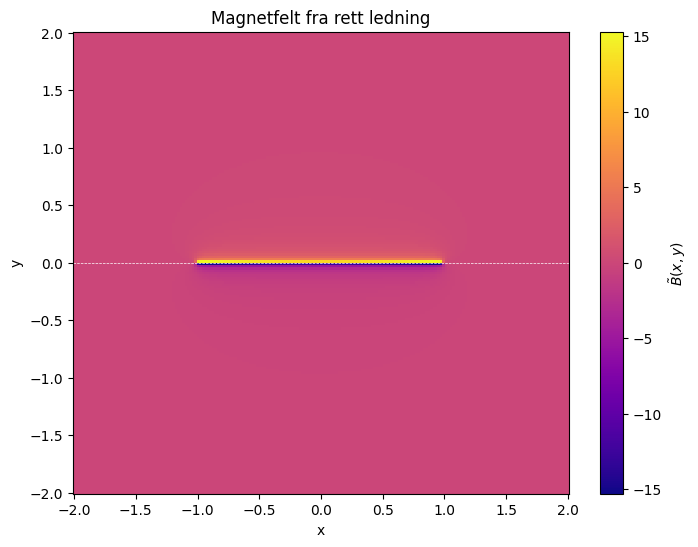

In [10]:
import matplotlib.pyplot as plt

L = 1
N = 100
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
xi, yj = np.meshgrid(x, y)

wire = create_wire(L,N)
B = calc_magneticfield(xi, yj, wire)
B_normalized = B / (4*np.pi*1e-7) #mu0*I/(4*pi) = 4*pi*1e-7 * I / 4*pi = 1e-7 * I

plt.figure(figsize=(8, 6))
plt.pcolormesh(xi, yj, B_normalized, shading='auto', cmap='plasma')
plt.colorbar(label=r"$\tilde{B}(x,y)$")
plt.title("Magnetfelt fra rett ledning")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='white', linestyle='--', linewidth=0.5) 
plt.show()

### Ekstraoppgave: Ledning vinkelrett på planet

En annen kjent konfigurasjon er en uendelig lang og uendelig tynn ledning orientert vinkelrett på planet med konstant strøm, $I$. Styrken på magnetfeltet vil da være trivielt være $|\vec{B}(\vec{r})| = \frac{\mu_0I}{4 \pi r^2}$, utfordringen med en numerisk formulering av denne situasjonen ligger i å beregne *retningen* magnetfeltet går i. 

$\textbf{a)}$ Plot magnetfeltet rundt en uendelig lang og uendelig tynn strømførende leder som står vinkelrett på planet i origo med konstant strøm, $I$, retning ut av planet.

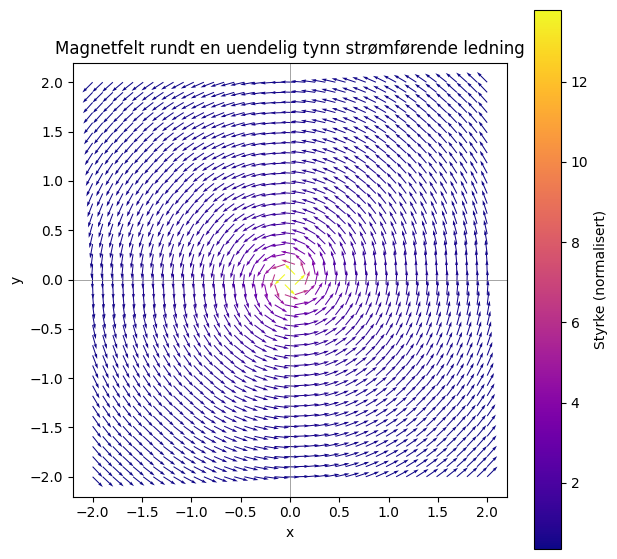

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 40)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)

mu0 = 4 * np.pi * 1e-7
I = 1

# Radius fra origo
r = np.sqrt(X**2 + Y**2)
r[r == 0] = 1e-12  # Unngå deling på 0

# Tangentiell vektor (mot klokka): B = ( -y/r^2, x/r^2 )
Bx = -Y / r**2
By = X / r**2

magnitude = np.sqrt(Bx**2 + By**2)
Bx_normalized = Bx / magnitude
By_normalized = By / magnitude

plt.figure(figsize=(7, 7))
plt.quiver(X, Y, Bx_normalized, By_normalized, magnitude, cmap="plasma", scale=30)
plt.title("Magnetfelt rundt en uendelig tynn strømførende ledning")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.gca().set_aspect('equal')
plt.colorbar(label="Styrke (normalisert)")
plt.show()


$\textbf{b)}$ Innfør flere ledninger i systemet, og se på hvordan magnetfeltet varier mht. posisjon og strømretning.

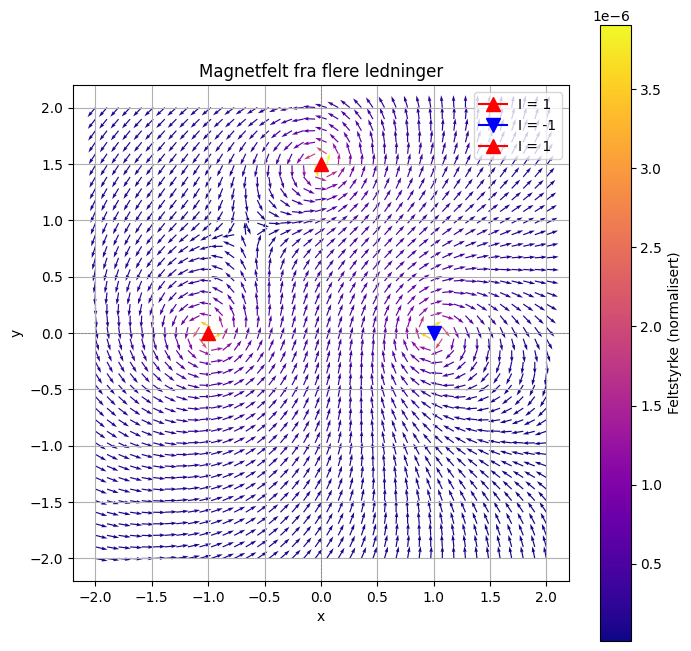

In [12]:
def compute_field(X, Y, wire_positions, currents):
    Bx_total = np.zeros_like(X)
    By_total = np.zeros_like(Y)
    mu0 = 4 * np.pi * 1e-7

    for (x0, y0), I in zip(wire_positions, currents):
        dx = X - x0
        dy = Y - y0
        r2 = dx**2 + dy**2
        r2[r2 == 0] = 1e-12  

        Bx = -mu0 * I * dy / (2 * np.pi * r2)
        By =  mu0 * I * dx / (2 * np.pi * r2)

        Bx_total += Bx
        By_total += By

    return Bx_total, By_total

x = np.linspace(-2, 2, 40)
y = np.linspace(-2, 2, 40)
X, Y = np.meshgrid(x, y)

# Format: [(x1, y1), (x2, y2), ...]
wire_positions = [(-1, 0), (1, 0), (0, 1.5)]
currents = [1, -1, 1]  # Ut av planet, inn i planet, ut av planet

Bx, By = compute_field(X, Y, wire_positions, currents)

magnitude = np.sqrt(Bx**2 + By**2)
Bx_norm = Bx / magnitude
By_norm = By / magnitude


plt.figure(figsize=(8, 8))
plt.quiver(X, Y, Bx_norm, By_norm, magnitude, cmap='plasma', scale=40)
plt.title("Magnetfelt fra flere ledninger")
plt.xlabel("x")
plt.ylabel("y")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal')
plt.colorbar(label="Feltstyrke (normalisert)")
plt.grid(True)

# Tegn ledningene
for (x0, y0), I in zip(wire_positions, currents):
    color = 'red' if I > 0 else 'blue'
    marker = '^' if I > 0 else 'v'
    plt.plot(x0, y0, marker=marker, color=color, markersize=10, label=f"I = {I}")

plt.legend()
plt.show()
